In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.discrete.discrete_model import Logit, MNLogit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * #import all metrics



In [8]:
data=pd.read_excel("SE_MGMT.xlsx")

In [9]:
data.isnull().any()

Country       False
Setid         False
Gender        False
Age           False
Edu           False
Income        False
Employment     True
GovEff        False
EconFree       True
GDP           False
GDP2          False
Econ          False
TEA_SEA       False
SE_sestart     True
GDPcat        False
dtype: bool

In [10]:
data.drop("Country",axis=1, inplace=True) #dropping the variables that we are not going to use in our model
data.drop("Setid",axis=1, inplace=True) 
data.drop("GovEff",axis=1, inplace=True)
data.drop("EconFree",axis=1, inplace=True)
data.drop("GDP",axis=1, inplace=True)
data.drop("GDP2",axis=1, inplace=True) 
data.drop("TEA_SEA",axis=1, inplace=True) 
data.drop("GDPcat",axis=1, inplace=True)

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.isnull().any()

Gender        False
Age           False
Edu           False
Income        False
Employment    False
Econ          False
SE_sestart    False
dtype: bool

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147978 entries, 0 to 152202
Data columns (total 7 columns):
Gender        147978 non-null object
Age           147978 non-null int64
Edu           147978 non-null object
Income        147978 non-null object
Employment    147978 non-null object
Econ          147978 non-null object
SE_sestart    147978 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 9.0+ MB


In [13]:
data_numeric=data.select_dtypes(exclude="object")
data_object=data.select_dtypes(include="object")

# Descriptive statistics

In [14]:
data_numeric.var()==0

Age           False
SE_sestart    False
dtype: bool

In [15]:
for i in data_object.columns:
    print(data[i].value_counts())
    print("\n","*********************")

female    78637
male      69341
Name: Gender, dtype: int64

 *********************
bachelor     50145
masters      49905
secondary    30371
primary      13763
doctoral      3794
Name: Edu, dtype: int64

 *********************
Second_33_percent    71036
Third_33_percent     50263
First_33_percent     26679
Name: Income, dtype: int64

 *********************
no     91294
yes    56684
Name: Employment, dtype: int64

 *********************
Developed_economy                  99490
Rapidly_industrialising_economy    37071
Less_developed_economy             11417
Name: Econ, dtype: int64

 *********************


In [19]:
data_final=data_numeric.join(data_dummies)

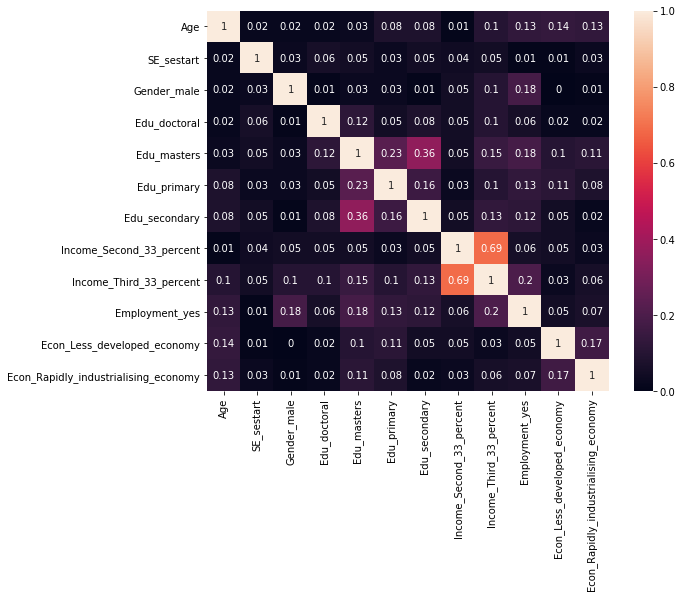

In [20]:
plt.figure(figsize=(9, 7)) #lets check the correlation between all the variables
sns.heatmap(data_final.corr().abs().round(2), annot=True)
plt.show()   #we see that none of the variables are highly correlated 

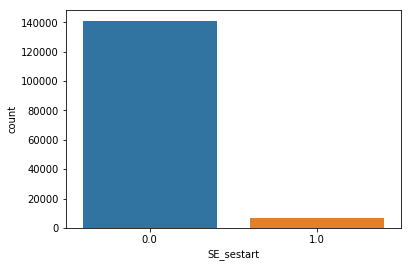

0.0    95.36
1.0     4.64
Name: SE_sestart, dtype: float64


In [22]:
sns.countplot(data_final.SE_sestart)
plt.show()
print((data_final.SE_sestart.value_counts()/len(data)*100).round(2)) #highly imbalanced data

In [86]:
pd.crosstab(data.Edu, data.SE_sestart, margins=True)

SE_sestart,0.0,1.0,All
Edu,,,
bachelor,47958,2187,50145
doctoral,3331,463,3794
masters,46900,3005,49905
primary,13356,407,13763
secondary,29574,797,30371
All,141119,6859,147978


In [87]:
pd.crosstab(data.Gender, data.SE_sestart, margins=True)

SE_sestart,0.0,1.0,All
Gender,,,
female,75479,3158,78637
male,65640,3701,69341
All,141119,6859,147978


# Logistic Regression from statsmodel

In [23]:
Y=data_final.SE_sestart
X=data_final.drop("SE_sestart",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
formula='SE_sestart~'+'+'.join(X.columns.tolist())
formula

'SE_sestart~Age+Gender_male+Edu_doctoral+Edu_masters+Edu_primary+Edu_secondary+Income_Second_33_percent+Income_Third_33_percent+Employment_yes+Econ_Less_developed_economy+Econ_Rapidly_industrialising_economy'

In [25]:
logit=Logit.from_formula(formula=formula, data=data_final).fit()

Optimization terminated successfully.
         Current function value: 0.182294
         Iterations 8


In [26]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             SE_sestart   No. Observations:               147978
Model:                          Logit   Df Residuals:                   147966
Method:                           MLE   Df Model:                           11
Date:                Mon, 10 Dec 2018   Pseudo R-squ.:                 0.02843
Time:                        14:48:08   Log-Likelihood:                -26975.
converged:                       True   LL-Null:                       -27765.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -3.3023      0.057    -57.702      0.000      -3.414      -3.190
Age                                     -0.0020      0.001     -2.296      0.022      -0.004      -0.000
Gender_male                              0.2643      0.025     10.439      0.000       0.215       0.314
Edu_doctoral                             1.1227      0.055     20.285      0.000       1.014       1.231
Edu_masters                              0.3865      0.030     13.065      0.000       0.329       0.444
Edu_primary                             -0.4420      0.056     -7.903      0.000      -0.552      -0.332
Edu_secondary                           -0.5136      0.042    -12.110      0.000      -0.597      -0.430
Income_Second_33_percent                -0.1103      0.038     -2.900      0.004      -0.185      -0.036
Income_Third_33_percent                  0.2138      0.039      5.491      0.000       0.137       0.290
Employment_yes                          -0.1102      0.027     -4.101      0.000      -0.163      -0.058
Econ_Less_developed_economy              0.4403      0.047      9.335      0.000       0.348       0.533
Econ_Rapidly_industrialising_economy     0.4395      0.029     15.393      0.000       0.384       0.495
========================================================================================================
"""

In [27]:
logit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             SE_sestart
Method:                          dydx
At:                           overall
========================================================================================================
                                          dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Age                                  -8.716e-05    3.8e-05     -2.295      0.022      -0.000   -1.27e-05
Gender_male                              0.0115      0.001     10.388      0.000       0.009       0.014
Edu_doctoral                             0.0490      0.002     19.972      0.000       0.044       0.054
Edu_masters                              0.0169      0.001     12.966      0.000       0.014       0.019
Edu_primary                             -0.0193      0.002     -7.879      0.000      -0.024      -0.015
Edu_secondary                           -0.0224      0.002    -12.022      0.000      -0.026      -0.019
Income_Second_33_percent                -0.0048      0.002     -2.899      0.004      -0.008      -0.002
Income_Third_33_percent                  0.0093      0.002      5.483      0.000       0.006       0.013
Employment_yes                          -0.0048      0.001     -4.098      0.000      -0.007      -0.003
Econ_Less_developed_economy              0.0192      0.002      9.299      0.000       0.015       0.023
Econ_Rapidly_industrialising_economy     0.0192      0.001     15.234      0.000       0.017       0.022
========================================================================================================
"""

# Logistic Regression from sklearn, Decision tree, Random Forest 

In [30]:
grids_tree=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                        param_grid={"max_depth":range(3,10),"min_samples_leaf":range(20,70)},
                        cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)
grids_logit=GridSearchCV(LogisticRegression(random_state=42,class_weight='balanced'),
                        param_grid={"C":np.linspace(0.00001,20,10),"penalty":["l1","l2"]},
                         cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)

In [32]:
print("Best params: {0}".format(gridsearch.best_params_))

Best params: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10}


In [33]:
best=list(grids_logit.best_params_.values())[0]
best

15.555557777777778

In [36]:
tree=DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=5,min_samples_leaf=10).fit(x_train,y_train)
logit=LogisticRegression(random_state=42,class_weight='balanced',C=best,penalty="l2").fit(x_train,y_train)

In [40]:
RF2=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=5,min_samples_leaf=10,n_estimators=30).fit(x_train,y_train)

# Accuracy, Recall, Roc_AUC

In [41]:
#Train
model={"tree":tree,"logit":logit, "Random Forest":RF2}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_train,models.predict(x_train)).round(2)*100)


 Recall
tree 68.0
logit 61.0
Random Forest 63.0

 ROC_AUC
tree 59.0
logit 60.0
Random Forest 60.0

 Accuracy
tree 51.0
logit 57.99999999999999
Random Forest 56.99999999999999


In [42]:
#Test
model={"tree":tree,"logit":logit, "Random Forest":RF2}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_test,models.predict(x_test)).round(2)*100)


 Recall
tree 67.0
logit 62.0
Random Forest 60.0

 ROC_AUC
tree 59.0
logit 60.0
Random Forest 57.99999999999999

 Accuracy
tree 51.0
logit 57.99999999999999
Random Forest 56.99999999999999


In [88]:
print("mean cross val score tree:",np.mean(cross_val_score(tree,X,Y,cv=5,n_jobs=-1,scoring="roc_auc")))
print("mean cross val score logit:",np.mean(cross_val_score(logit,X,Y,cv=5,n_jobs=-1,scoring="roc_auc")))
print("mean cross val score RF2:",np.mean(cross_val_score(RF2,X,Y,cv=5,n_jobs=-1,scoring="roc_auc")))

mean cross val score tree: 0.5709790062413045
mean cross val score logit: 0.6159562886082008
mean cross val score RF2: 0.5966993332666121


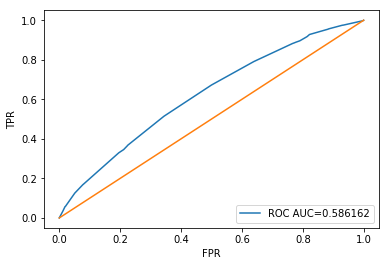

In [43]:
FPR,TPR,tresholds=roc_curve(y_test,tree.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,tree.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [44]:
importance=pd.DataFrame(data=tree.feature_importances_,index=X.columns,columns=['importances'])
importance.sort_values(by="importances",ascending=False)

,importances
Edu_secondary,0.281223
Edu_doctoral,0.145528
Edu_masters,0.138049
Econ_Rapidly_industrialising_economy,0.114843
Age,0.095511
Income_Third_33_percent,0.068667
Econ_Less_developed_economy,0.063228
Gender_male,0.052342
Edu_primary,0.023257
Employment_yes,0.016403


In [45]:
tree_graph=export_graphviz(tree,out_file="tree.dot", class_names=True, feature_names=X.columns, filled=True) 
#Go to http://webgraphviz.com/

In [56]:
data1=pd.read_excel("SE_MGMT.xlsx")

In [57]:
data1=data1.drop(columns=["Setid", "Econ", "TEA_SEA", "GovEff", "EconFree", "GDP2", "GDP", "Country"])

In [58]:
data1.isnull().any()

Gender        False
Age           False
Edu           False
Income        False
Employment     True
SE_sestart     True
GDPcat        False
dtype: bool

In [59]:
data1.dropna(axis=0,inplace=True)

In [63]:
data_numeric1=data1.select_dtypes(exclude="object")
data_object1=data1.select_dtypes(include="object")

In [64]:
data_dummies1=pd.get_dummies(data_object1,prefix=data_object1.columns,drop_first=True)

In [65]:
data_final1=data_numeric1.join(data_dummies1)

# Logistic Regression from stats model

In [66]:
Y1=data_final1.SE_sestart
X1=data_final1.drop("SE_sestart",axis=1)
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [67]:
formula1='SE_sestart~'+'+'.join(X1.columns.tolist())
formula1

'SE_sestart~Age+Gender_male+Edu_doctoral+Edu_masters+Edu_primary+Edu_secondary+Income_Second_33_percent+Income_Third_33_percent+Employment_yes+GDPcat_low+GDPcat_medium'

In [68]:
logit1=Logit.from_formula(formula=formula1, data=data_final1).fit()

Optimization terminated successfully.
         Current function value: 0.180865
         Iterations 8


In [69]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             SE_sestart   No. Observations:               147978
Model:                          Logit   Df Residuals:                   147966
Method:                           MLE   Df Model:                           11
Date:                Mon, 10 Dec 2018   Pseudo R-squ.:                 0.03605
Time:                        16:18:08   Log-Likelihood:                -26764.
converged:                       True   LL-Null:                       -27765.
                                        LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.0726      0.058    -52.848      0.000      -3.187      -2.959
Age                         -0.0042      0.001     -4.816      0.000      -0.006      -0.002
Gender_male                  0.2797      0.025     11.022      0.000       0.230       0.329
Edu_doctoral                 1.0499      0.055     18.950      0.000       0.941       1.158
Edu_masters                  0.4419      0.030     14.917      0.000       0.384       0.500
Edu_primary                 -0.3657      0.057     -6.466      0.000      -0.477      -0.255
Edu_secondary               -0.4172      0.043     -9.760      0.000      -0.501      -0.333
Income_Second_33_percent    -0.0304      0.038     -0.797      0.425      -0.105       0.044
Income_Third_33_percent      0.2527      0.039      6.480      0.000       0.176       0.329
Employment_yes              -0.0981      0.027     -3.629      0.000      -0.151      -0.045
GDPcat_low                   0.1951      0.029      6.642      0.000       0.138       0.253
GDPcat_medium               -0.7507      0.039    -19.490      0.000      -0.826      -0.675
============================================================================================
"""

In [71]:
logit1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             SE_sestart
Method:                          dydx
At:                           overall
============================================================================================
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0002   3.78e-05     -4.811      0.000      -0.000      -0.000
Gender_male                  0.0122      0.001     10.964      0.000       0.010       0.014
Edu_doctoral                 0.0457      0.002     18.701      0.000       0.041       0.051
Edu_masters                  0.0193      0.001     14.774      0.000       0.017       0.022
Edu_primary                 -0.0159      0.002     -6.453      0.000      -0.021      -0.011
Edu_secondary               -0.0182      0.002     -9.714      0.000      -0.022      -0.015
Income_Second_33_percent    -0.0013      0.002     -0.797      0.425      -0.005       0.002
Income_Third_33_percent      0.0110      0.002      6.468      0.000       0.008       0.014
Employment_yes              -0.0043      0.001     -3.627      0.000      -0.007      -0.002
GDPcat_low                   0.0085      0.001      6.630      0.000       0.006       0.011
GDPcat_medium               -0.0327      0.002    -19.142      0.000      -0.036      -0.029
============================================================================================
"""

# Logistic Regression from sklearn, Decision tree, Random Forest 

In [72]:
grids_tree1=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                        param_grid={"max_depth":range(3,10),"min_samples_leaf":range(20,70)},
                        cv=5,n_jobs=-1,scoring="roc_auc").fit(X1,Y1)
grids_logit1=GridSearchCV(LogisticRegression(random_state=42,class_weight='balanced'),
                        param_grid={"C":np.linspace(0.00001,20,10),"penalty":["l1","l2"]},
                         cv=5,n_jobs=-1,scoring="roc_auc").fit(X1,Y1)

In [73]:
print("Best params: {0}".format(gridsearch.best_params_))

Best params: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10}


In [74]:
best=list(grids_logit1.best_params_.values())[0]
best

8.888894444444444

In [75]:
tree1=DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=5,min_samples_leaf=10).fit(x_train1,y_train1)
logit1=LogisticRegression(random_state=42,class_weight='balanced',C=best,penalty="l2").fit(x_train1,y_train1)

In [76]:
RF=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=5,min_samples_leaf=10,n_estimators=30).fit(x_train1,y_train1)

In [77]:
#Train
model1={"tree":tree1,"logit":logit1, "Random Forest":RF}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_train1,models.predict(x_train1)).round(2)*100)


 Recall
tree 70.0
logit 66.0
Random Forest 63.0

 ROC_AUC
tree 57.99999999999999
logit 57.99999999999999
Random Forest 57.99999999999999

 Accuracy
tree 48.0
logit 51.0
Random Forest 54.0


In [78]:
#Test
model1={"tree":tree1,"logit":logit1, "Random Forest":RF}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(y_test1,models.predict(x_test1)).round(2)*100)


 Recall
tree 69.0
logit 66.0
Random Forest 61.0

 ROC_AUC
tree 57.99999999999999
logit 57.99999999999999
Random Forest 56.99999999999999

 Accuracy
tree 48.0
logit 51.0
Random Forest 54.0


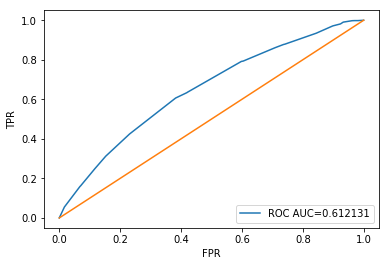

In [80]:
FPR,TPR,tresholds=roc_curve(y_test1,tree1.predict_proba(x_test1)[:,1])
plt.figure(figsize=(6,4))
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test1,tree1.predict(x_test1)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [89]:
print("mean cross val score tree:",np.mean(cross_val_score(tree1,X1,Y1,cv=5,n_jobs=-1,scoring="roc_auc")))
print("mean cross val score logit:",np.mean(cross_val_score(logit1,X1,Y1,cv=5,n_jobs=-1,scoring="roc_auc")))
print("mean cross val score RF2:",np.mean(cross_val_score(RF,X1,Y1,cv=5,n_jobs=-1,scoring="roc_auc")))

mean cross val score tree: 0.6049403580220964
mean cross val score logit: 0.6644514998615509
mean cross val score RF2: 0.6345270911260755


In [82]:
importance=pd.DataFrame(data=tree1.feature_importances_,index=X1.columns,columns=['importances'])
importance.sort_values(by="importances",ascending=False)

,importances
GDPcat_medium,0.333565
Edu_doctoral,0.167485
Edu_masters,0.147847
Age,0.117495
Edu_secondary,0.095846
Edu_primary,0.046029
Gender_male,0.044693
Income_Third_33_percent,0.042219
GDPcat_low,0.004270
Income_Second_33_percent,0.000551


In [83]:
tree_graph1=export_graphviz(tree1,out_file="tree1.dot", class_names=True, feature_names=X1.columns, filled=True) 